In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## SHM (Euler method)

In [19]:
dt = 0.01
A = np.array([[0,1],[-1,0]])
def Euler_step(th0, dt):
    thn = th0 + (A @ th0)*dt
    return thn

In [20]:
t = 0
tb = 10
th = []
th0 = np.array([1,0])
while t < tb:
    th0 = Euler_step(th0,dt)
    th.append(th0)
    t = t + dt
th = np.array(th)

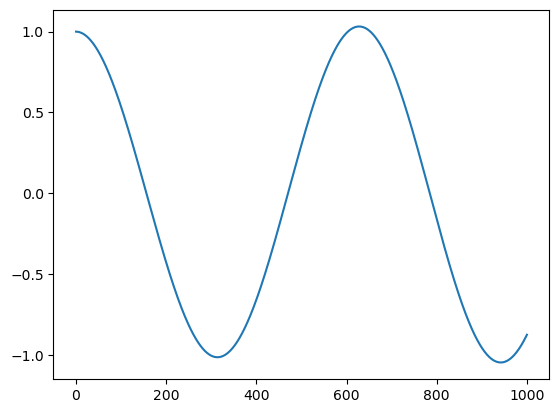

In [21]:
plt.plot(th[:,0])

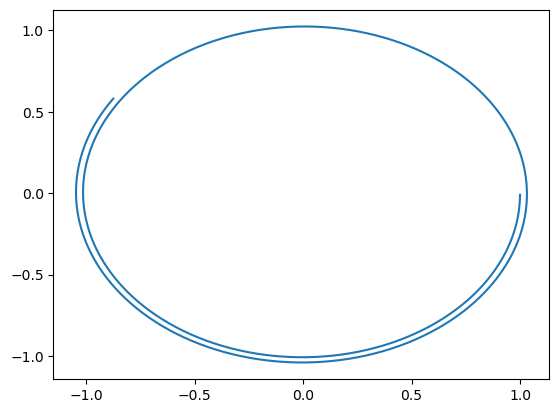

In [22]:
plt.plot(th[:,0],th[:,1])

## Pendulum

### Euler method

In [48]:
dt = 0.01
def Euler_step(th0, omega0, dt):
    thn = th0 + omega0*dt
    omegan = omega0 - np.sin(th0)*dt
    return thn, omegan

In [65]:
t = 0
tb = 20
thp = []
omega = []
thp0 = 0
omega0 = 2
while t < tb:
    thp0, omega0 = Euler_step(thp0, omega0, dt)
    thp.append(thp0)
    omega.append(omega0)
    t = t + dt
thp = np.array(thp)

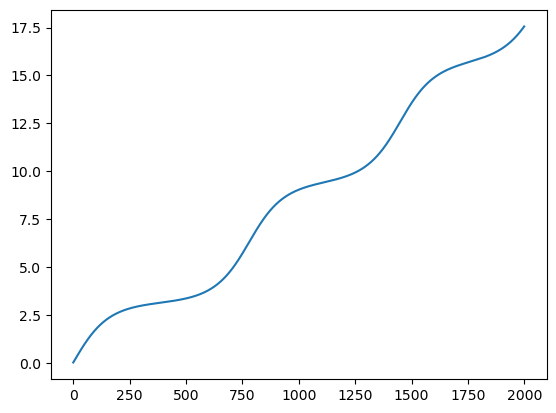

In [66]:
plt.plot(thp)

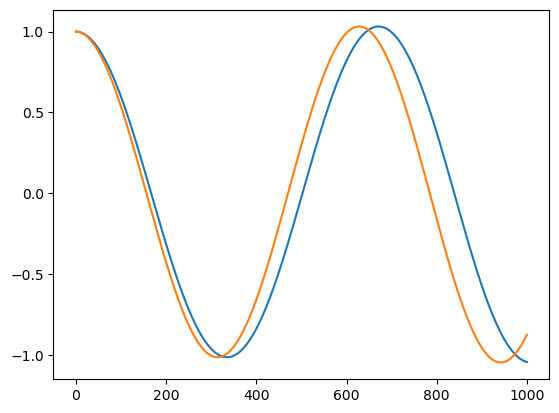

In [10]:
plt.plot(thp)
plt.plot(th[:,0])

In [111]:
thp[-1]

-1.0453347612206747

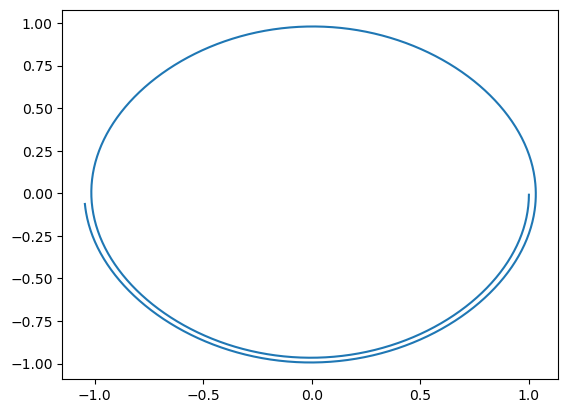

In [112]:
plt.plot(thp,omega)

### Runge-Kutta 4th-order

In [11]:
def f(thw):
    dthw = np.array([thw[1],-np.sin(thw[0])])
    return dthw

In [13]:
thw0 = np.array([1,0])
sol = integrate.RK45(lambda t, thw: f(thw), 
                      t0=0, y0=thw0, t_bound = 10)
t_values = []
y_values = []
i=0
while sol.status != 'finished':
    sol.step()
    t_values.append(sol.t)
    y_values.append(sol.y)
    i = i + 1
    print(f"({i}) The time is: {sol.t}")
y_values = np.array(y_values)

(1) The time is: 0.0011872078978802409
(2) The time is: 0.01305928687668265
(3) The time is: 0.13178007666470673
(4) The time is: 0.9734757026902336
(5) The time is: 1.9413956708203646
(6) The time is: 2.9093156389504955
(7) The time is: 3.949490313529797
(8) The time is: 4.985084946835341
(9) The time is: 5.946263987469394
(10) The time is: 6.9008689710940265
(11) The time is: 8.0295842206312
(12) The time is: 8.958737617181132
(13) The time is: 9.863010780521513
(14) The time is: 10


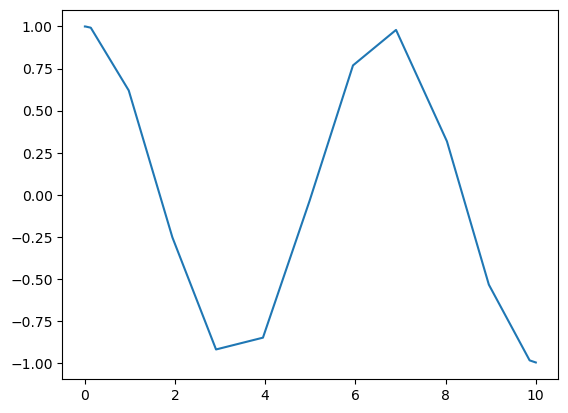

In [14]:
plt.plot(t_values,y_values[:,0])

In [15]:
y_values[-1,0]

-0.9961684063893271

In [16]:
tl = np.linspace(0,10,500)
yl = []
for ti in tl:
    sol = integrate.RK45(lambda t, thw: f(thw), 
                      t0=0, y0=thw0, t_bound = ti)
    while sol.status != 'finished':
        sol.step()
    yl.append(sol.y)
yl = np.array(yl)    

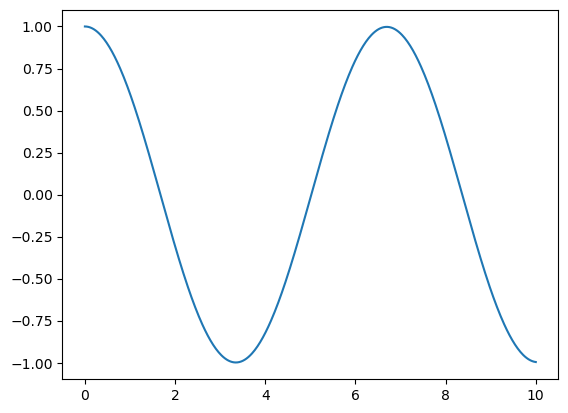

In [17]:
plt.plot(tl,yl[:,0])

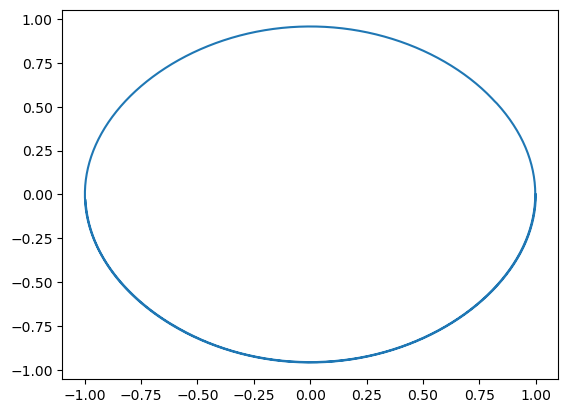

In [23]:
plt.plot(yl[:,0],yl[:,1])
plt.show()

## More non-linear examples

### Euler method

In [31]:
dt = 0.01
def Euler_step(x0, dxdt0, t, dt):
    xn = x0 + dxdt0*dt
    dxdtn = dxdt0 + (-gamma*dxdt0 -omega**2*x0 + beta*x0**2 + f0*np.cos(omegad*t))*dt
    return xn, dxdtn

In [44]:
t = 0
tt = 1000
x = []
dxdt = []
x0 = 1
dxdt0 = 0
omega = 1
gamma = 0.1
beta = 0.2
omegad = 0.51
f0 = 0.1
while t < tt:
    x0, dxdt0 = Euler_step(x0, dxdt0, t, dt)
    x.append(x0)
    dxdt.append(dxdt0)
    t = t + dt
x = np.array(x)
dxdt = np.array(dxdt)

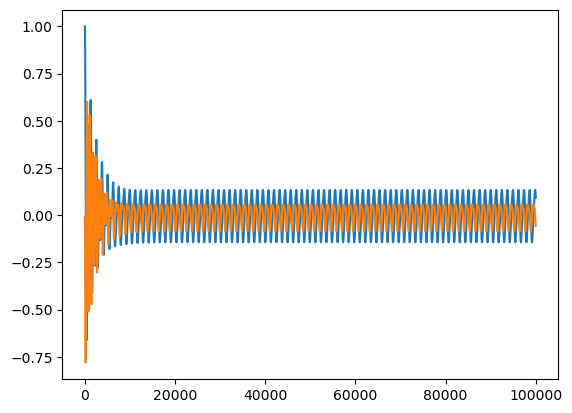

In [45]:
plt.plot(x)
plt.plot(dxdt)

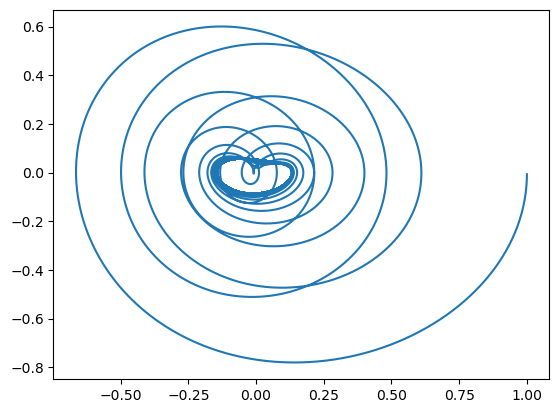

In [47]:
plt.plot(x,dxdt)

In [ ]:
omega = 0.5
gamma = 0.3
beta = 0.1
omegad = 0.8
f0 = 1